# Vectors

In [1]:
import sympy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
my_cmap = cm.Pastel2

# Versions: So you know which documentation to look at
print("Version of sympy: \t" + str(sympy.__version__)) 
print("Version of matplotlib: \t" + str(matplotlib.__version__)) 
print("Version of numpy: \t" + str(np.__version__))

# Make things from sympy print nicely.
sympy.init_printing() 

# Output of this cell may change depending on which computer you run it on.

Version of sympy: 	1.6.1
Version of matplotlib: 	3.3.0
Version of numpy: 	1.19.1


In [2]:
from sympy.vector import CoordSys3D
# Create our coordinate system, call it N.
N = CoordSys3D('N') 

# Make a vector
v1 = 3*N.i + 4*N.j
# Print it out
v1

## Find the magnitude of the vector

$$
    \| \mathbf{v} \| = \sqrt{ v^2_1 + v^2_2 + \ldots + v^2_n}
$$

In [3]:
v1.magnitude()

## Finding the unit-vector

$$
    \hat{\mathbf{v}} = \frac{\mathbf{v}}{\| \mathbf{v} \|}
$$

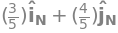

In [4]:
v_hat = v1 / v1.magnitude()
v_hat

This is also called 'normalising' and can be done using the `normalize()` method.

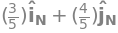

In [5]:
v_normalised = v1.normalize()
v_normalised

You can even use python to check that they are the same:

In [6]:
if v_normalised == v_hat:
    print("They're the same!")
else:
    print("They're NOT the same!")

They're the same!


In [7]:
(v1.components)[N.i]

### Function to plot vectors at origin in 2D

In [8]:
"""
Takes in a list of vectors and plots them on a 2D cartesian plane with starting points at the origin.
Colour will be different for each vector.
"""
def plot_vecs_2D(v_list):
    x = [int(vec.components[N.i]) for vec in v_list]
    y = [int(vec.components[N.j]) for vec in v_list]
    x_pos = [0 for el in x]
    y_pos = [0 for el in y]
    # soa = np.array([[0, 0, 3, 2], [0, 0, 1, 1], [0, 0, 9, 9]])
    # X, Y, U, V = zip(*soa) # unzipping
    plt.figure()
    ax = plt.gca()
    colours = np.linspace(1,2,len(x))
    ax.quiver(x_pos, y_pos, x, y, [colours], angles='xy', scale_units='xy', scale=1, cmap=my_cmap)
    lower_x = min([0, 1.2*min(x)])
    lower_y = min([0, 1.2*min(y)])
    upper_x = max([10, 1.2*max(x)])
    upper_y = max([10, 1.2*max(y)])
    ax.set_xlim([lower_x, upper_x])
    ax.set_ylim([lower_y, upper_y])
    plt.xlabel("$x$-component")
    plt.ylabel("$y$-component")
    plt.grid()
    plt.show()

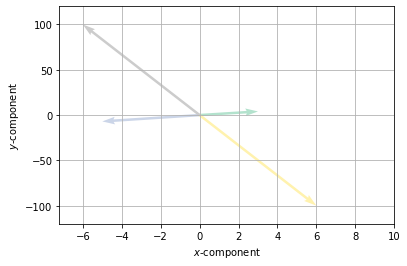

In [9]:
v2 = -5*N.i + -7*N.j
v3 = 6*N.i + -100*N.j
v4 = -1 * v3
plot_vecs_2D([v1, v2,v3, v4])

## Graphically proving the parallelogram law

In [10]:
"""
Pass in two vectors, 2D..
"""
def parallelogram_law(v_1, v_2):
    x =    [float(v1.components[N.i]),
            float(v2.components[N.i]),
            float(v1.components[N.i]),
            float(v2.components[N.i])]
    y =    [float(v1.components[N.j]),
            float(v2.components[N.j]),
            float(v1.components[N.j]),
            float(v2.components[N.j])]
    x_pos = [0,0,float(v2.components[N.i]),float(v1.components[N.i])]
    y_pos = [0,0,float(v2.components[N.j]),float(v1.components[N.j])]
    # soa = np.array([[0, 0, 3, 2], [0, 0, 1, 1], [0, 0, 9, 9]])
    # X, Y, U, V = zip(*soa) # unzipping
    plt.figure()
    ax = plt.gca()
    
    ax.quiver(x_pos, y_pos, x, y, [1,2,1,2], angles='xy', scale_units='xy', scale=1, cmap=my_cmap)
    lower_x = min([0,  1.2 * (v1.components[N.i]+v2.components[N.i]) ])
    lower_y = min([0,  1.2 * (v1.components[N.j]+v2.components[N.j]) ])
    upper_x = max([10, 1.2 * (v1.components[N.i]+v2.components[N.i]) ])
    upper_y = max([10, 1.2 * (v1.components[N.j]+v2.components[N.j]) ])
    print(lower_x, lower_y, upper_x, upper_y)
    ax.set_xlim([int(lower_x), int(upper_x)])
    ax.set_ylim([int(lower_y), int(upper_y)])
    plt.xlabel("$x$-component")
    plt.ylabel("$y$-component")
    plt.grid()
    plt.show()

0 0 10 124.800000000000


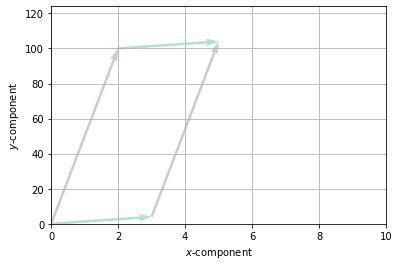

In [11]:
v1 = 3*N.i + 4*N.j
v2 = 2*N.i + 100*N.j
parallelogram_law(v1, v2)

# Matrices

In [12]:
from sympy import init_printing, Matrix, eye, zeros, diag, Symbol
init_printing() # Pretty printing

## Make a Vector

In [13]:


# Column vector


v = Matrix([
    [1],
    [2],
    [3]
])

# Row vector
u = Matrix([    [4,5,6]  ])


display(v, u)

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

[4  5  6]

## Make a Matrix

In [14]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

A

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

## Identity Matrices

In [15]:
eye(2)

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [16]:
eye(5)

⎡1  0  0  0  0⎤
⎢             ⎥
⎢0  1  0  0  0⎥
⎢             ⎥
⎢0  0  1  0  0⎥
⎢             ⎥
⎢0  0  0  1  0⎥
⎢             ⎥
⎣0  0  0  0  1⎦

## Zero Matrices

In [17]:
zeros(3)

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

In [18]:
zeros(6)

⎡0  0  0  0  0  0⎤
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎢0  0  0  0  0  0⎥
⎢                ⎥
⎣0  0  0  0  0  0⎦

## Diagonal Matrices

You can pass in a series of values that will be positioned along the diagonal of a square matrix.

In [19]:
diag(1,2,3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦

In [20]:
diag(4,5,6,7)

⎡4  0  0  0⎤
⎢          ⎥
⎢0  5  0  0⎥
⎢          ⎥
⎢0  0  6  0⎥
⎢          ⎥
⎣0  0  0  7⎦

In [21]:
diag(3.14, 2.71, 6.626)

⎡3.14   0      0  ⎤
⎢                 ⎥
⎢ 0    2.71    0  ⎥
⎢                 ⎥
⎣ 0     0    6.626⎦

## Access Rows/Columns at a Time

Once you have created a `Matrix`, you can access it's rows and columns with the appropriate method for that object.

There are however two caveats to indexing matrices in python. 
1. Python is 'column-major', meaning if you access a two-dimensional array you specify **column first and then row**. This is the opposite way around as the way we do it with matrices.
2. Numbering starts from `0` in python. So what we would usually refer to as row 1, we will from here on in refer to as row 0.

In [22]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

# Row access
display(A.row(0))

# Column access
display(A.col(0))

# Element-specific indexing
display(A[0,2]) # See, row first, then column!
display(A[2,2])

# You can also access the n-th element in the matrix if you fancy.
display(A[4])

[1  2  3]

⎡1⎤
⎢ ⎥
⎢4⎥
⎢ ⎥
⎣7⎦

## Want reduced-row-echelon-form (rref)?

In [23]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

A.rref() # As simple as that!

⎛⎡1  0  -1⎤        ⎞
⎜⎢        ⎥        ⎟
⎜⎢0  1  2 ⎥, (0, 1)⎟
⎜⎢        ⎥        ⎟
⎝⎣0  0  0 ⎦        ⎠

We can see that two elements were returned. The first is the row-reduced form of $\mathbf{A}$, the other is a `tuple` of the columns of $\mathbf{A}$ that contain pivots.

## Want the inverse of a matrix?

In [24]:
# Resetting A (in case of unordered use of cells)
A = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])

A.inv() # One-liner!

⎡4/11  5/11   3/11⎤
⎢                 ⎥
⎢5/11  -2/11  1/11⎥
⎢                 ⎥
⎣3/11  1/11   5/11⎦

## Transpose of a matrix?

In [25]:
# Resetting A (in case of unordered use of cells)
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

display(A)
display(A.T) # Note that this is an attribute and not a method (no need for parantheses to call a function).

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

⎡1  4  7⎤
⎢       ⎥
⎢2  5  8⎥
⎢       ⎥
⎣3  6  9⎦

## Now with row-reductions:

Because `sympy` has automated a lot of the matrix processes, it seems that row operations are not particularly intuitive operations for whatever reason that may be.

The best way to learn this is likely to closely follow the example below and ask questions.

In [26]:
# Resetting A (in case of unordered use of cells)
A = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])

display(A)

⎡1   2   -1⎤
⎢          ⎥
⎢2   -1  -1⎥
⎢          ⎥
⎣-1  -1  3 ⎦

In [27]:
# R1 = R1 - 2*R0                          .  < That dot is above the row number you're subtracting.
A.row_op(1, lambda one, row_el: one - 2*A[0,row_el])
#                                            ^ This is a varaible to allow sympy to iterate over all row elements
display(A)

⎡1   2   -1⎤
⎢          ⎥
⎢0   -5  1 ⎥
⎢          ⎥
⎣-1  -1  3 ⎦

In [28]:
# R2 = R2 + R0
A.row_op(2, lambda two, row_el: two + A[0,row_el])
display(A)

⎡1  2   -1⎤
⎢         ⎥
⎢0  -5  1 ⎥
⎢         ⎥
⎣0  1   2 ⎦

In [29]:
# R1 <--> R2
A.row_swap(1,2)
display(A)

⎡1  2   -1⎤
⎢         ⎥
⎢0  1   2 ⎥
⎢         ⎥
⎣0  -5  1 ⎦

In [30]:
# R2 = R2 + 5*R1
A.row_op(2, lambda two, row_el: two + 5*A[1, row_el])
display(A)

⎡1  2  -1⎤
⎢        ⎥
⎢0  1  2 ⎥
⎢        ⎥
⎣0  0  11⎦

In [31]:
# R2 = (1/11)*R2
A.row_op(2, lambda two, row_el: int((1/11)*A[2,row_el]))
display(A)

⎡1  2  -1⎤
⎢        ⎥
⎢0  1  2 ⎥
⎢        ⎥
⎣0  0  1 ⎦

In [32]:
# R1 = R1 - 2*R2
A.row_op(1, lambda one, row_el: one - 2*A[2,row_el])
display(A)

⎡1  2  -1⎤
⎢        ⎥
⎢0  1  0 ⎥
⎢        ⎥
⎣0  0  1 ⎦

In [33]:
# R0 = R0 + R2
A.row_op(0, lambda zero, row_el: zero+ A[2, row_el])
display(A)

⎡1  2  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [34]:
# R0 = R0 -2*R1
A.row_op(0, lambda zero, row_el: zero -2*A[1, row_el])
display(A)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

## Invert a Matrix to Solve 
$$
\mathbf{Ax}=\mathbf{b} \quad \Rightarrow \quad 
\mathbf{x}=\mathbf{A^{-1}b}
$$

In [35]:
# Changing A
A = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])

# Right-hand side of the equation
b = Matrix([
    5,
    0,
    8
])

# Solving the equation.
x = A.inv()*b

display(x)

⎡4⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣5⎦

## Symbolic Matrices

The useful thing about some calculations is specifying a value in your matrix so that some property is true.

E.g.

Determine the value of $c$ so that $\mathbf{A}$ has a determinant of 0.

$$
\mathbf{A} = 
\begin{bmatrix}
    c & 2 & 1 \\
    5      & -1 & 2 \\
    -3     & 1 & -1 \\
\end{bmatrix}
$$

In [36]:
c = Symbol('c')

A = Matrix([
    [c,2,1],
    [5,-1,2],
    [-3,1,-1]
])

display('A is: ', A)


display('Det(A) = ', A.det())

'A is: '

⎡c   2   1 ⎤
⎢          ⎥
⎢5   -1  2 ⎥
⎢          ⎥
⎣-3  1   -1⎦

'Det(A) = '

So if:
$$\text{det}(\mathbf{A}) = 0$$
then $$-c=0 \quad \text{ and so } \quad c=0$$ 

for the matrix to have a determinant of zero.

A matrix with a zero determinant is called a 'singular' matrix.

## Eigenvalues & Eigenvectors

An eigenvalue and eigenvector are solutions to the following equation:

$$
\mathbf{Ax}
=
\lambda
\mathbf{x}
$$

Where $\lambda$ is an _eigen**value**_ and $\mathbf{x}$ is an _eigen**vector**_.



* The direction of an _eigen**vector**_ is unchanged, but its magnitude may not be.

* So we can say that $\mathbf{x}$ is a vector who's direction is unchanged by the linear transformation, $\mathbf{A}$.

* The _eigen**value**_ is how much the magnitude of the _eigen**vector**_ is changed.

The approach is to:

1. Find the _eigen**values**_.
2. Use each _eigen**value** to find one _eigen**vector**_.

### Eigenvalues

In [37]:
A = Matrix([
    [1,2],
    [2,4]
])

e_vals = A.eigenvals()

print('Type of object: \t' + str(type(e_vals)))

Type of object: 	<class 'dict'>


So the `eigenval` method has returned us a `dictionary` object. So, what are the `keys` and `values`?

In [38]:
e_vals.keys()

dict_keys([5, 0])

In [39]:
e_vals.values()

dict_values([1, 1])

In [40]:
display(e_vals)

The eigenvalues: $\lambda_1 = 0$ and $\lambda_2=5$ are the `keys` of the `dictionary`. The `values` in that `dictionary` are the 'multiplicity' of that eigenvalue, meaning how many times that eigenvalue occurred. For both values, their multiplicity is one.

### Eigenvectors

In [41]:
# Resetting A (in case of unordered cells).
A = Matrix([
    [1,2],
    [2,4]
])

A.eigenvects()

⎡⎛      ⎡⎡-2⎤⎤⎞  ⎛      ⎡⎡1/2⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜5, 1, ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

From the `eigenvects` method we are returned a `list` containing `tuples`.

We also have the information we previously gathered (the eigenvalues) as well as the requested eigenvectors.

Interpretting the first element of the `list`:

The eigenvalue $\lambda_1 = 0$ with multiplicity $1$ is used to obtain the vector $\begin{bmatrix} -2 \\ 1 \end{bmatrix}$.

And interpretting the second value in the `list`:

The eigenvalue $\lambda_2 = 5$ with multiplicity $1$ is used to obtain the vector $\begin{bmatrix} 1/2 \\ 1 \end{bmatrix}$.

# -------- Questions --------

# Question 0:

Display the transpose of the following matrix:

(Run the cell to obtain the matrix)


In [ ]:
from sympy import init_printing, Matrix, eye, zeros, diag, Symbol, randMatrix
init_printing()

A = randMatrix(5,5)
display(A)

# Answer 0:


In [42]:
display(A.T)

⎡1  2⎤
⎢    ⎥
⎣2  4⎦

## Question 1:

If you have a matrix:

In [70]:
A = randMatrix(3,3)
display(A)

⎡47  53  78⎤
⎢          ⎥
⎢72  52  64⎥
⎢          ⎥
⎣60  21  62⎦

Find the `rref` and determine if it has an inverse.

## Answer 1:

In [71]:
B = A.rref()

display(B)

B[0].inv()

⎛⎡1  0  0⎤           ⎞
⎜⎢       ⎥           ⎟
⎜⎢0  1  0⎥, (0, 1, 2)⎟
⎜⎢       ⎥           ⎟
⎝⎣0  0  1⎦           ⎠

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

## Question 2:


$$
    \begin{bmatrix} 
        4 & 3 \\
		-10 & -2 \\		
    \end{bmatrix}
    \begin{bmatrix} 
        x \\
		y \\		
    \end{bmatrix}
    =
    \begin{bmatrix} 
        -13 \\
        5 \\
    \end{bmatrix}
$$

Solve for $x$ and $y$.

## Answer 2:

In [49]:
# Changing A
A = Matrix([
    [4,3],
    [-10,-2],
])

b = Matrix([
    -13,
    5,
])
x = A.inv()*b

display(x)

⎡1/2⎤
⎢   ⎥
⎣-5 ⎦

## Question 3:

Determine the eigenvalues and eigenvectors of:

$$
\mathbf{Q}
=
\begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix}
$$

## Answer 3:

In [50]:
Q = Matrix([
    [0,1],
    [-1,0]
])

Q.eigenvects()

⎡⎛       ⎡⎡ⅈ⎤⎤⎞  ⎛      ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜-ⅈ, 1, ⎢⎢ ⎥⎥⎟, ⎜ⅈ, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

# Question 4:

Show, using `if` statements and comparisons, that the following matrix is equal itself after being multiplied by an appropriately sized identity matrix.

# Answer 4:


In [55]:
from sympy import randMatrix

A = randMatrix(6,6)
display(A)

# Your code here
if (eye(6) * A) == A:
    print("Multiplying a matrix by the identity matrix produces the original matrix.")
else:
    print("Something is wrong.")

⎡91  60  87  2   19  7 ⎤
⎢                      ⎥
⎢80  93  16  66  12  35⎥
⎢                      ⎥
⎢38  57  53  50  45  47⎥
⎢                      ⎥
⎢86  41  69  58  46  6 ⎥
⎢                      ⎥
⎢66  97  56  25  74  67⎥
⎢                      ⎥
⎣99  82  70  91  0   76⎦

Multiplying a matrix by the identity matrix produces the original matrix.


# Question 5:

(i) Write a loop to create five square, random matrices. Determine if each of them have an inverse.

(ii) Write another loop to create five rectangular, random matrices. Should these have an inverse? What happens when you attempt to invert them?

What can we say about the `randMatrix` function?

In [80]:
some_rand_matrices = []
for i in range(5):
    some_rand_matrices.append(randMatrix(i+1,i+1))
    
for m in some_rand_matrices:
    display(m)
    print("Does this matrix have an inverse?")
    try:
        inverse = m.inv()
        print("Yes. The inverse is:")
        display(inverse)
    except ValueError:
        print("No. determinant is zero.")
        
print("Some rectangular matrices")
    
some_rand_rectangular_matrices = []
for i in range(5):
    some_rand_rectangular_matrices.append(randMatrix(i+1,i+2))
    
display(some_rand_rectangular_matrices[0])

for rect_m in some_rand_rectangular_matrices:
    try:
        rect_m.inv()
    except Exception as e:
        print(f"Couldn't inverse rectangular matrix. Got a {type(e)} exception")

[65]

Does this matrix have an inverse?
Yes. The inverse is:


[1/65]

⎡38  25⎤
⎢      ⎥
⎣44  9 ⎦

Does this matrix have an inverse?
Yes. The inverse is:


⎡         25 ⎤
⎢-9/758  ─── ⎥
⎢        758 ⎥
⎢            ⎥
⎢  22    -19 ⎥
⎢ ───    ────⎥
⎣ 379    379 ⎦

⎡51  11  32⎤
⎢          ⎥
⎢54  7   71⎥
⎢          ⎥
⎣64  59  13⎦

Does this matrix have an inverse?
Yes. The inverse is:


⎡ 2049   -349   -557 ⎤
⎢─────   ─────  ─────⎥
⎢39560   15824  79120⎥
⎢                    ⎥
⎢-1921    277    1893⎥
⎢──────  ─────  ─────⎥
⎢39560   15824  79120⎥
⎢                    ⎥
⎢-1369    461    237 ⎥
⎢──────  ─────  ─────⎥
⎣39560   15824  79120⎦

⎡97  98  78  26⎤
⎢              ⎥
⎢27  24  83  54⎥
⎢              ⎥
⎢21  98  43  42⎥
⎢              ⎥
⎣80  45  64  82⎦

Does this matrix have an inverse?
Yes. The inverse is:


⎡ 63952    -47417    -153581    65893  ⎤
⎢───────   ───────   ────────  ─────── ⎥
⎢7941795   5294530   15883590  7941795 ⎥
⎢                                      ⎥
⎢  3783    -25759     60251     -8148  ⎥
⎢───────   ───────   ───────   ─────── ⎥
⎢2647265   5294530   5294530   2647265 ⎥
⎢                                      ⎥
⎢ 13923     48118    -11937    -29988  ⎥
⎢───────   ───────   ───────   ─────── ⎥
⎢2647265   2647265   2647265   2647265 ⎥
⎢                                      ⎥
⎢-202441   -29429     213083    232391 ⎥
⎢────────  ────────  ────────  ────────⎥
⎣15883590  10589060  31767180  15883590⎦

⎡88  24  41  11  63⎤
⎢                  ⎥
⎢80  36  97  19  55⎥
⎢                  ⎥
⎢3   61  72  56  25⎥
⎢                  ⎥
⎢39  33  42  26  95⎥
⎢                  ⎥
⎣94  71  6   45  33⎦

Does this matrix have an inverse?
Yes. The inverse is:


⎡2470639    -55907    679759    -1069051   -13703 ⎤
⎢────────   ───────  ────────   ─────────  ───────⎥
⎢56717584   2985136  56717584    56717584  2025628⎥
⎢                                                 ⎥
⎢-5194831    155063  -2151217   1709605     61257 ⎥
⎢─────────  ───────  ─────────  ────────   ───────⎥
⎢ 28358792  1492568   28358792  28358792   1012814⎥
⎢                                                 ⎥
⎢ -10532     4225     39205     -48057     -2804  ⎥
⎢ ───────   ──────   ────────   ────────   ────── ⎥
⎢ 3544849   373142   14179396   14179396   506407 ⎥
⎢                                                 ⎥
⎢ 55651     -34565    26979      -18479     -567  ⎥
⎢ ──────    ───────   ──────     ───────    ───── ⎥
⎢ 271376     271376   271376      271376     9692 ⎥
⎢                                                 ⎥
⎢-513959      4339   -397059     990159      459  ⎥
⎢────────   ───────  ────────   ────────   ───────⎥
⎣56717584   2985136  56717584   56717584   2025628⎦

Some rectangular matrices


[3  4]

Couldn't inverse rectangular matrix. Got a <class 'sympy.matrices.common.NonSquareMatrixError'> exception
Couldn't inverse rectangular matrix. Got a <class 'sympy.matrices.common.NonSquareMatrixError'> exception
Couldn't inverse rectangular matrix. Got a <class 'sympy.matrices.common.NonSquareMatrixError'> exception
Couldn't inverse rectangular matrix. Got a <class 'sympy.matrices.common.NonSquareMatrixError'> exception
Couldn't inverse rectangular matrix. Got a <class 'sympy.matrices.common.NonSquareMatrixError'> exception


## Bonus Question :

What is meant by a 'pivot'?